# Introduction to Linear Regression

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Iris Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [3]:
# read data into a DataFrame
# Loading built-in Datasets:
data = sns.load_dataset("iris")

data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


What are the **features**?
- sepal_length
- sepal_width
- petal_length
- petal_width

What is the **response**?
- Species

In [4]:
# print the shape of the DataFrame
data.shape

(150, 5)

There are 150 **observations** in the dataset.

Iris dataset actually has 50 samples from each of three species of Iris flower (Setosa, Virginica and Versicolor). 

Four features were measured (in centimeters) from each sample: Length and Width of the Sepals and Petals. Let us try to have a summarized view of this dataset:

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
print('Iris-setosa')
setosa = data['species'] == 'setosa'
print(data[setosa].describe())
print('\nIris-versicolor')
versicolor = data['species'] == 'versicolor'
print(data[versicolor].describe())
print('\nIris-virginica')
virginica = data['species'] == 'virginica'
print(data[virginica].describe())

Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

Iris-versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        

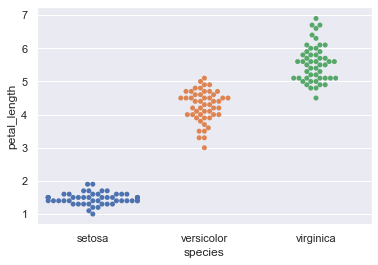

In [8]:
sns.set()
sns.swarmplot(x="species", y ="petal_length", data = data)

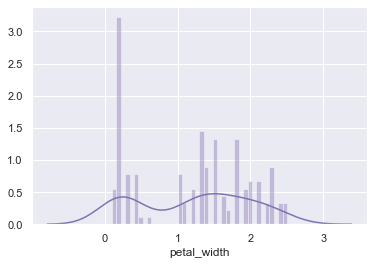

In [9]:
sns.distplot(a=data['petal_width'], bins=40, color='m')

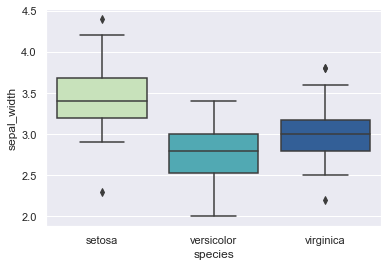

In [10]:
sns.boxplot(x='species',y='sepal_width',data=data ,palette='YlGnBu')

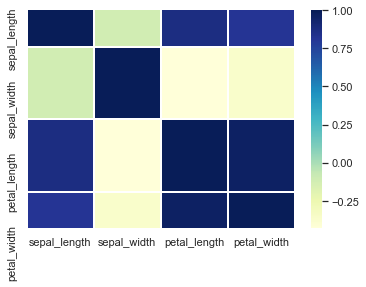

In [11]:
sns.heatmap(data.corr(),cmap="YlGnBu", linecolor='white', linewidths=1)

In [12]:
print('Covariance:')
data.cov()

Covariance:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


## Pair Plot

Pair Plot is used to view the pairwise relationship between all the variables in a dataset and the diagonal axes show the univariate distribution of the variable.

The example takes the entire dataset as input and distinguishes data on species with varying colors.

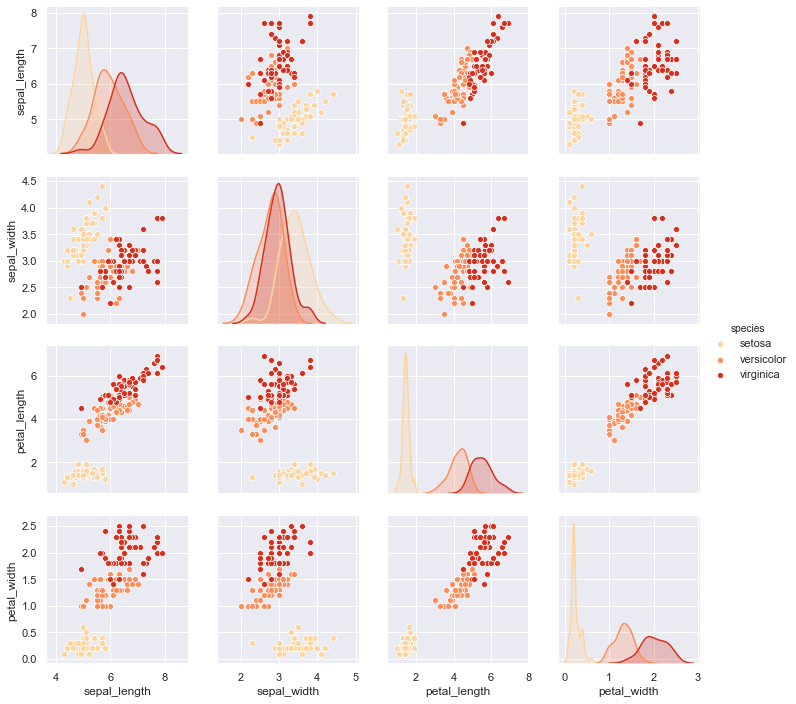

In [13]:
sns.pairplot(data, hue='species', palette="OrRd")

## Regression Plots

Regression Plot is used to map all the given data and plot a linear regression model fit for it.

In the example below, we have plotted the petal_width against the petal_length.

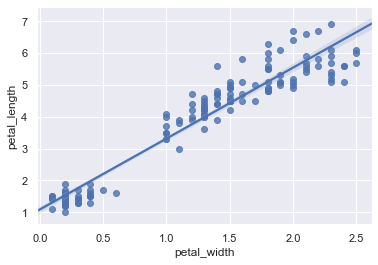

In [14]:
sns.regplot(x='petal_width', y='petal_length', data=data)

## Missing data

In [15]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

<img src="images/17/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="images/17/slope_intercept.png">

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [16]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='petal_width ~ petal_length', data=data).fit()

# print the coefficients
lm.params

Intercept      -0.363076
petal_length    0.415755
dtype: float64

In [17]:
# print a summary of the fitted model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.68e-86
Time:                        10:08:05   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""